<a href="https://colab.research.google.com/github/nxshi/IDS131F21/blob/main/ProblemSets/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
DATADIR = os.path.join('/content/gdrive/My Drive/ps4')
import networkx as nx
from itertools import combinations
from numpy import matrix

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
A = [[0, 1, 0, 0, 0], [0,0,0,0,0],[1,1,0,0,0],[1,1,0,0,0],[1,1,0,0,0]]

In [ ]:
W = [[0,3,0,0,0],[3,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]

In [ ]:
A

[[0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 1, 0, 0, 0]]

In [ ]:
np.transpose(A)

array([[0, 0, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [ ]:
np.matmul(A,np.transpose(A))

array([[1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 2, 2, 2],
       [1, 0, 2, 2, 2],
       [1, 0, 2, 2, 2]])

In [ ]:
np.matmul(np.transpose(A),A)

array([[3, 3, 0, 0, 0],
       [3, 4, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [ ]:
W

[[0, 3, 0, 0, 0],
 [3, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [ ]:
A = [[0,1,0],[0,0,1],[1,1,0]]

In [ ]:
np.matmul(A,np.transpose(A))

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 2]])

In [ ]:
np.matmul(np.transpose(A),A)

array([[1, 1, 0],
       [1, 2, 0],
       [0, 0, 1]])

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/ps4/Cooffending.csv')

In [ ]:
df = df.rename(columns={'NoUnique':'Offender'})

In [ ]:
df = df.rename(columns={'SeqE':'Crime'})

In [ ]:
df

,Offender,Naissance,SEXE,Crime,dateInf,NCD1,NCD2,NCD3,NCD4,MUN,ED1,Jeunes,Adultes,Date,annee
0,1,1007,F,1085034,20051217,3530,,,,58227,2,0,1,12/17/2005,2005
1,2,1828,F,1431379,20080423,1430,,,,94068,5,0,1,04/23/2008,2008
2,4,1889,M,167174,20080306,1430,21702,,,49058,2,0,1,03/06/2008,2008
3,5,1892,M,1179096,20080821,1420,,,,65005,71,0,1,08/21/2008,2008
4,17,1897,M,1270690,20030430,1625,,,,23027,,0,3,04/30/2003,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280454,670532,2004,F,1112491,20090326,1330,,,,58227,34,0,1,03/26/2009,2009
1280455,670533,2004,M,78081,20090629,21702,,,,46075,10,0,4,06/29/2009,2009
1280456,670534,2005,M,187904,20090316,21201,21702,,,31015,1,0,4,03/16/2009,2009
1280457,670535,2005,M,523837,20091018,21704,,,,98806,1,0,1,10/18/2009,2009


In [ ]:
df_short = pd.DataFrame(df, columns=['Offender', 'Crime'])
df_short

# %%
merge = pd.merge(df_short, df_short, on='Crime')
merge

# %%

filtered_pairs = merge.copy()
filtered_pairs= filtered_pairs.loc[(filtered_pairs['Offender_x'] < filtered_pairs['Offender_y'])]
filtered_pairs = filtered_pairs.reset_index(drop=True)

filtered_pairs

,Offender_x,Crime,Offender_y
0,17,1270690,583103
1,17,1270690,592054
2,583103,1270690,592054
3,232,22585,670001
4,302,1040440,531384
...,...,...,...
217109,670482,523600,670527
217110,670485,273608,670499
217111,670488,379245,670489
217112,670501,1217712,670528


In [ ]:
pairs2 = merge.copy()
pairs2 = pairs2.loc[(pairs2['Offender_x'] != pairs2['Offender_y'])]
pairs2 = pairs2.reset_index(drop=True)

In [ ]:
len(pairs2['Offender_x'].unique())

121159

In [ ]:
pairs2

,Offender_x,Crime,Offender_y
0,17,1270690,583103
1,17,1270690,592054
2,583103,1270690,17
3,583103,1270690,592054
4,592054,1270690,17
...,...,...,...
434223,670489,379245,670488
434224,670501,1217712,670528
434225,670528,1217712,670501
434226,670521,1632652,670536


In [ ]:
Degree = pd.DataFrame(pairs2.groupby(['Offender_x']).count())

In [ ]:
Degree

,Crime,Offender_y
Offender_x,,
17,2,2
232,1,1
302,1,1
309,1,1
319,1,1
...,...,...
670528,1,1
670530,1,1
670533,3,3


In [ ]:
Degree = pd.Series(Degree['Crime'].values)

Text(0.5, 0, 'Degree (log)')

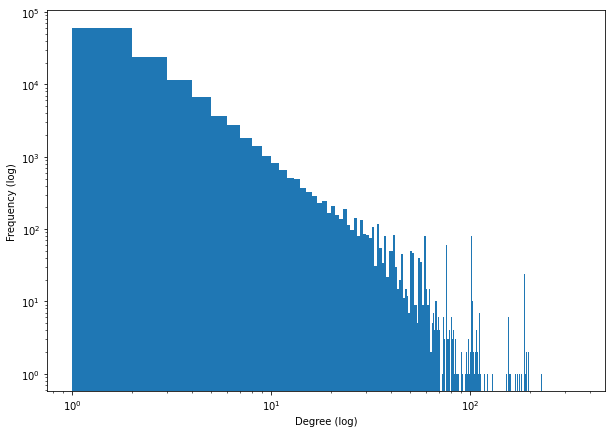

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
plt.hist(Degree, bins = list(range(1,Degree.max())))
ax.set_yscale('log')
ax.set_xscale('log')
plt.ylabel('Frequency (log)')
plt.xlabel('Degree (log)')

In [ ]:
G = pd.DataFrame(filtered_pairs.groupby(['Offender_x','Offender_y']))

In [ ]:
edgelist = list(G[0])

In [ ]:
H = nx.Graph(edgelist)

Text(0, 0.5, 'Frequency (log)')

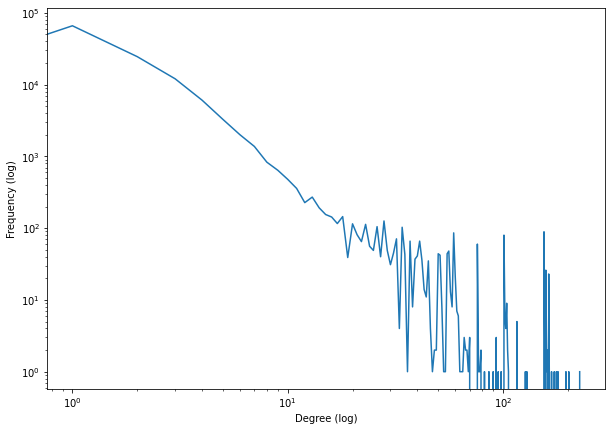

In [ ]:
# Degree Histogram 2
#m = 0
degree_freq = nx.degree_histogram(H)
degrees = range(len(degree_freq))
plt.figure(figsize=(10, 7))
plt.loglog(degrees, degree_freq)
#plt.loglog(degrees[m:], degree_freq[m:]) 
plt.xlabel('Degree (log)')
plt.ylabel('Frequency (log)')

In [ ]:
# number of connected
nx.algorithms.components.number_connected_components(H)

36098

In [ ]:
# nodes in largest connected component
max([len(c) for c in sorted(nx.connected_components(H), key=len, reverse=True)])

19924

In [ ]:
# Largest Connected Network
largest_cc = max(nx.connected_components(H), key=len)
S = [H.subgraph(c).copy() for c in sorted(nx.connected_components(H), key=len, reverse = True)]
L = S[0]

In [ ]:
# Edge Density
print('H = '+str(nx.classes.function.density(H)))
print('L = '+str(nx.classes.function.density(L)))

H = 2.430797134609805e-05
L = 0.0003556454848657796


Text(0.5, 0, 'Degree (log)')

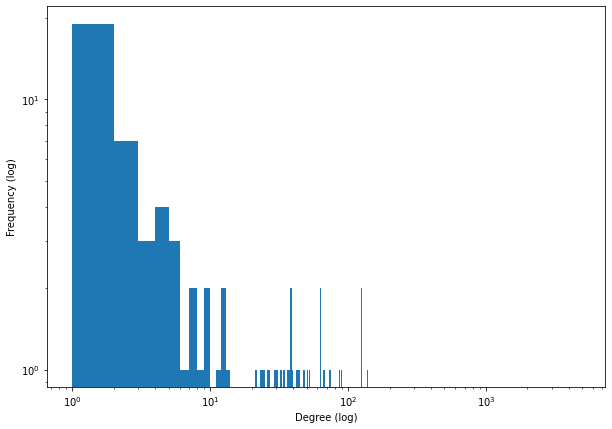

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
plt.hist(pd.Series(degree_freq), bins = list(range(1,pd.Series(degree_freq).max())))
ax.set_yscale('log')
ax.set_xscale('log')
plt.ylabel('Frequency (log)')
plt.xlabel('Degree (log)')

Text(0, 0.5, 'Frequency (log)')

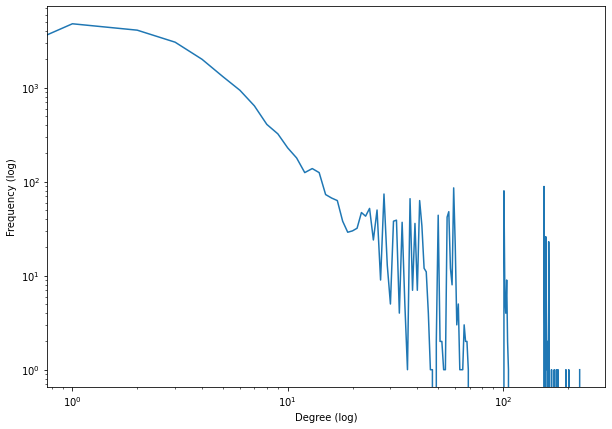

In [ ]:
# Degree Historgram
m = 0
degree_freq = nx.degree_histogram(L)
degrees = range(len(degree_freq))
plt.figure(figsize=(10, 7))
plt.loglog(degrees[m:], degree_freq[m:])
plt.xlabel('Degree (log)')
plt.ylabel('Frequency (log)')

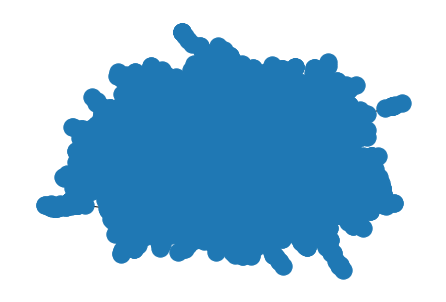

In [ ]:
nx.draw(L)

^ this took 19 mins and gave me nothing

In [ ]:
# cluster diameter
nx.algorithms.distance_measures.diameter(L)

^ that took 21 fucking minutes, i got 48

In [ ]:
nx.algorithms.distance_measures.diameter(H)

NetworkXError: ignored

In [ ]:
#clustering coefficients
nx.algorithms.cluster.clustering(L)

In [ ]:
# average degree
print(nx.algorithms.assortativity.average_degree_connectivity(L))
print(nx.algorithms.assortativity.average_neighbor_degree(L))
print(nx.algorithms.assortativity.average_degree_connectivity(H))
print(nx.algorithms.assortativity.average_neighbor_degree(H))

AttributeError: ignored

In [ ]:
# DF of largest CC
df_lcc = df[df.Offender.isin(list(largest_cc))].copy()

In [ ]:
df_mun = pd.DataFrame(df_lcc, columns=['Offender', 'MUN'])
df_mun = df_mun.drop_duplicates()
pairs_mun = pd.merge(df_mun, df_mun, on= 'Offender')
mun_matrix = pd.pivot_table(pairs_mun, columns = 'MUN_x', index= 'MUN_y', values ='Offender', aggfunc=pd.Series.nunique)
pairs_mun_dense = pairs_mun.loc[pairs_mun.MUN_x != pairs_mun.MUN_y]
mun_matrix_dense = pd.pivot_table(pairs_mun_dense, columns = 'MUN_x', index= 'MUN_y', values ='Offender', aggfunc=pd.Series.nunique)

Text(141.0, 0.5, 'Municipality')

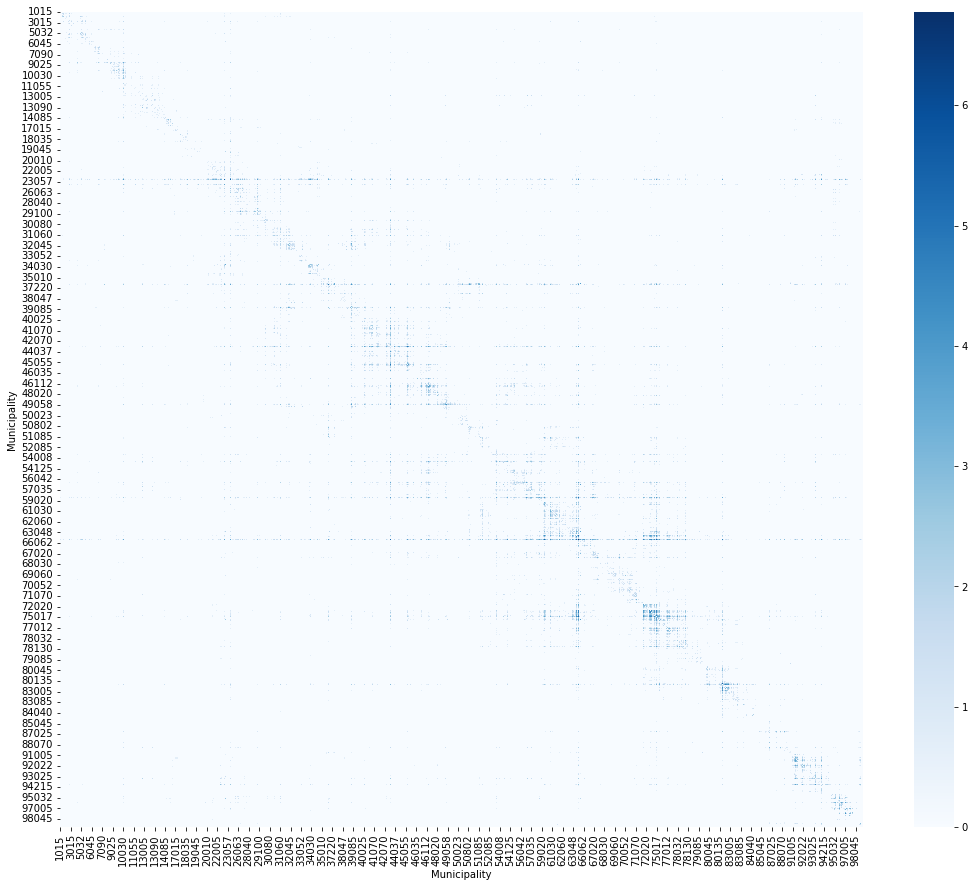

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize= (18,15))
ax = sns.heatmap(np.log(mun_matrix_dense).fillna(0), cmap = 'Blues')
plt.xlabel('Municipality')
plt.ylabel('Municipality')

In [ ]:
mun_matrix_dense = np.log(mun_matrix_dense).fillna(0)
mun_matrix_dense = np.log(mun_matrix_dense)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(141.0, 0.5, 'Municipality')

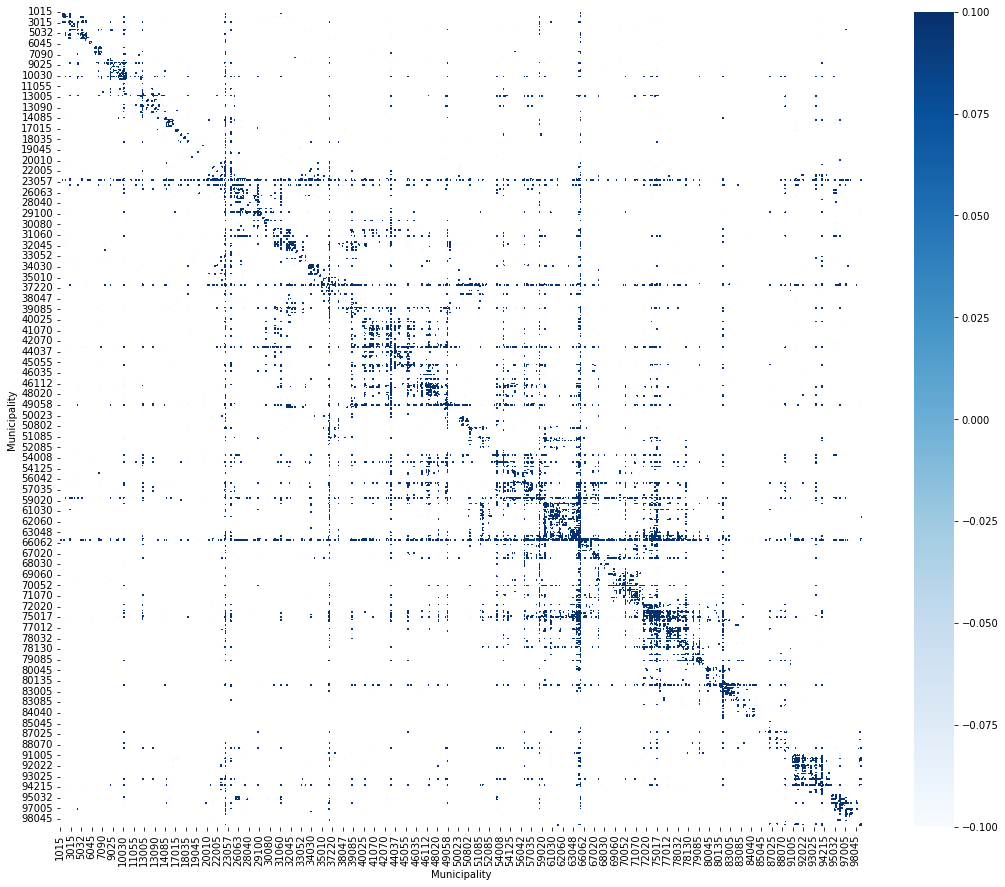

In [ ]:
fig, ax = plt.subplots(figsize= (18,15))
ax = sns.heatmap(mun_matrix_dense, cmap = 'Blues')
plt.xlabel('Municipality')
plt.ylabel('Municipality')

In [ ]:
df_ed = pd.DataFrame(df_lcc, columns=['Offender', 'ED1'])
df_ed = df_ed.drop_duplicates()
pairs_ed = pd.merge(df_ed, df_ed, on= 'Offender')
ed_matrix = pd.pivot_table(pairs_ed, columns = 'ED1_x', index = 'ED1_y', values ='Offender', aggfunc=pd.Series.nunique)
pairs_ed_dense = pairs_ed.loc[pairs_ed.ED1_x != pairs_ed.ED1_y]
ed_matrix_dense = pd.pivot_table(pairs_ed_dense, columns = 'ED1_x', index = 'ED1_y', values ='Offender', aggfunc=pd.Series.nunique)

Text(141.0, 0.5, 'Place of Crime')

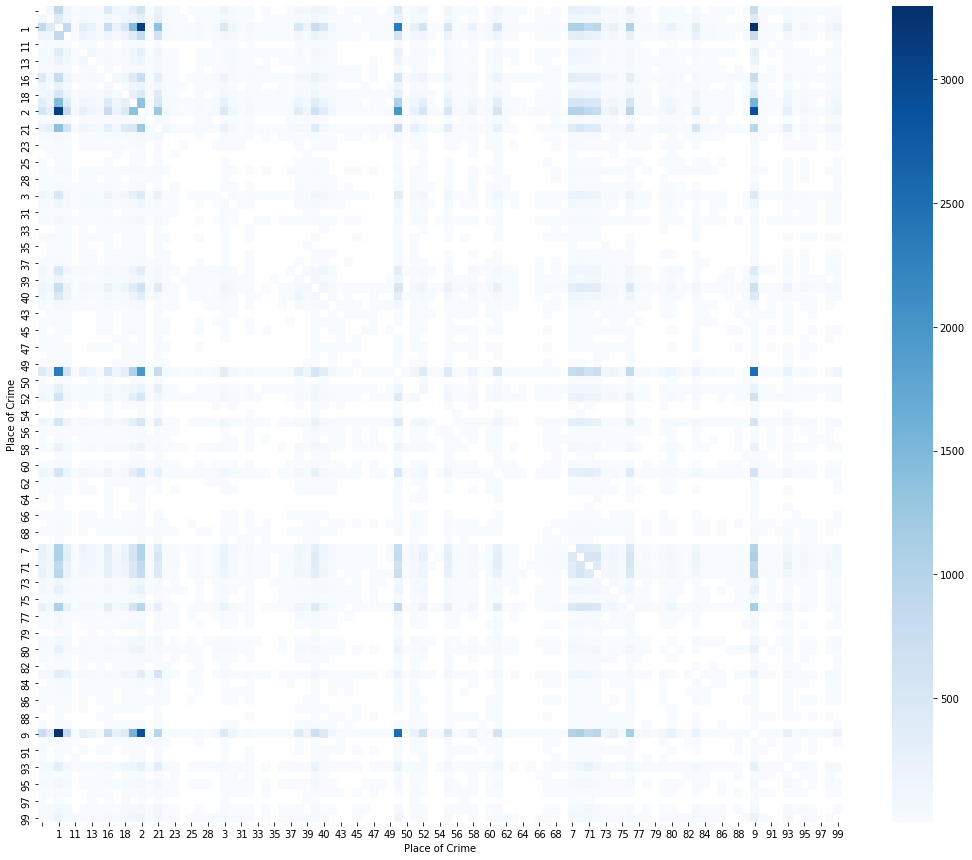

In [ ]:
fig, ax = plt.subplots(figsize= (18,15))
ax = sns.heatmap(ed_matrix_dense, cmap = 'Blues')
plt.xlabel('Place of Crime')
plt.ylabel('Place of Crime')

Text(141.0, 0.5, 'Place of Crime')

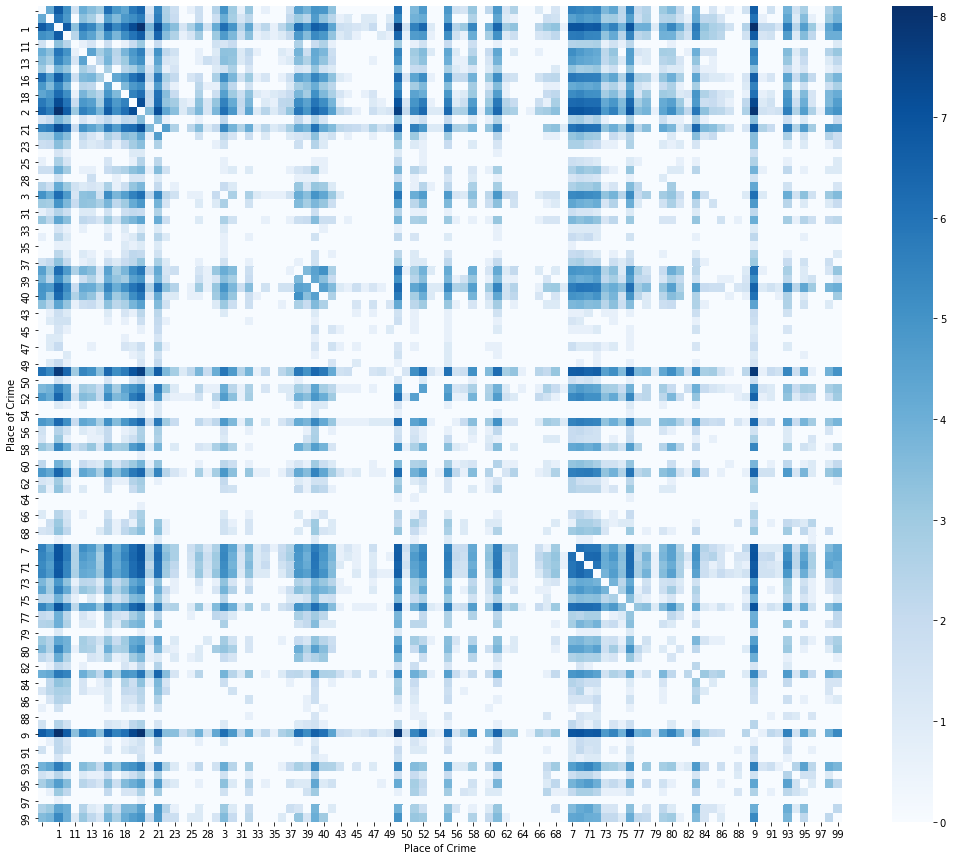

In [ ]:
fig, ax = plt.subplots(figsize= (18,15))
ax = sns.heatmap(np.log(ed_matrix_dense).fillna(0), cmap = 'Blues')
plt.xlabel('Place of Crime')
plt.ylabel('Place of Crime')

## Date vs place of crime

In [ ]:
df_test = df.copy()

In [ ]:
dfshort = pd.DataFrame(df, columns=['ED1', 'Date'])

In [ ]:
dfshort = dfshort.rename(columns={'ED1':'Place of Crime'})

In [ ]:
place = list(range(0,100))

In [ ]:
from datetime import datetime

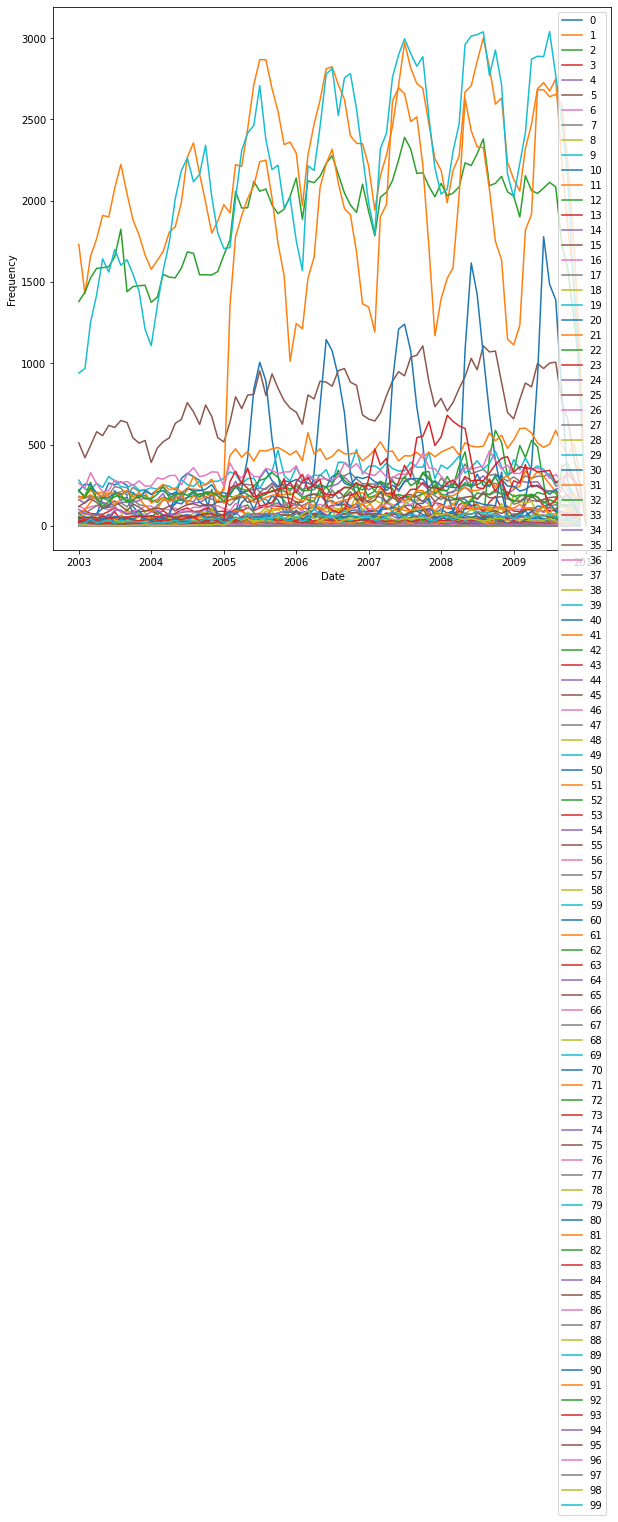

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
for i in place:
  arr = dfshort.loc[dfshort['Place of Crime'] == str(i)]
  arr = arr.reset_index(drop=True)
  t = pd.to_datetime(arr['Date'], format = "%m/%d/%Y")
  arr['Date'] = t
  arr['Date'] = arr['Date'].dt.to_period('M')
  arr = arr['Date'].value_counts().sort_index()
  arr = arr.to_timestamp()
  plt.plot(arr, label = str(i))
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()

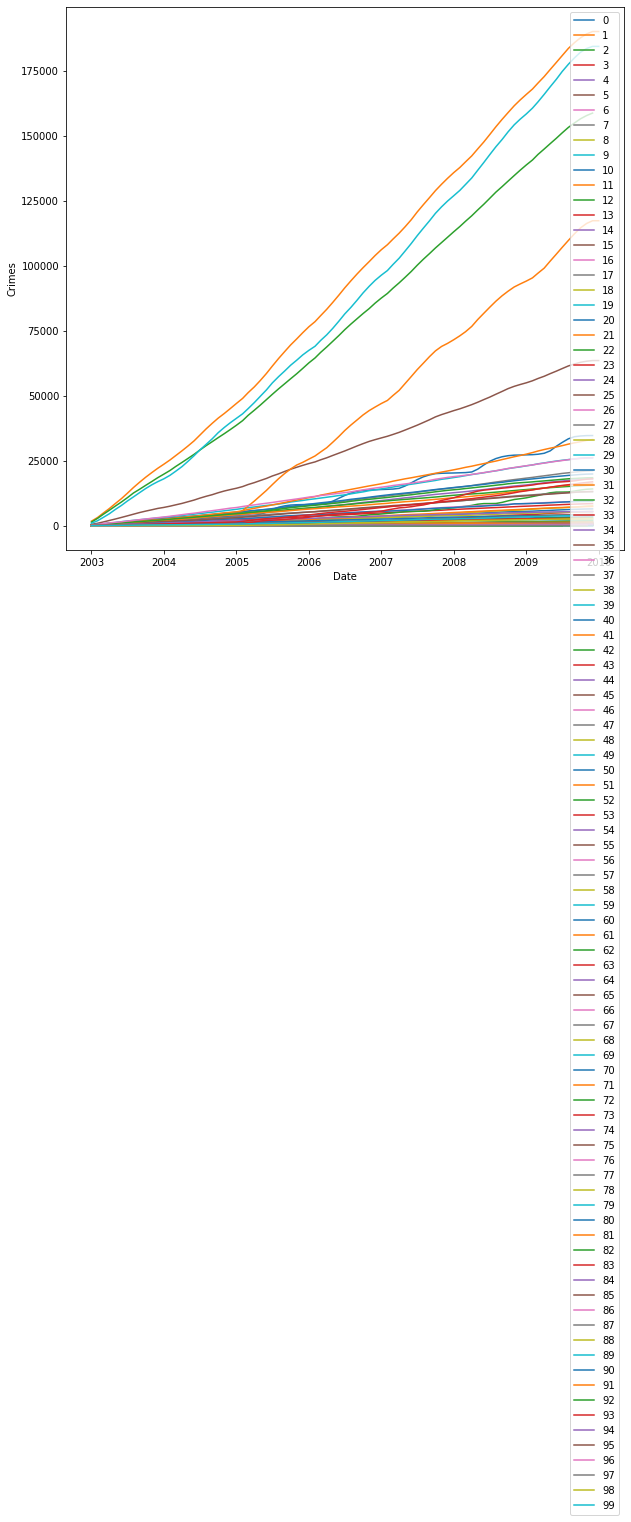

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
for i in place:
  arr = dfshort.loc[dfshort['Place of Crime'] == str(i)]
  arr = arr.reset_index(drop=True)
  t = pd.to_datetime(arr['Date'], format = "%m/%d/%Y")
  arr['Date'] = t
  arr['Date'] = arr['Date'].dt.to_period('M')
  arr = arr['Date'].value_counts().sort_index()
  arr = arr.to_timestamp()
  plt.plot(arr.cumsum(), label = str(i))
plt.xlabel('Date')
plt.ylabel('Crimes')
plt.legend()

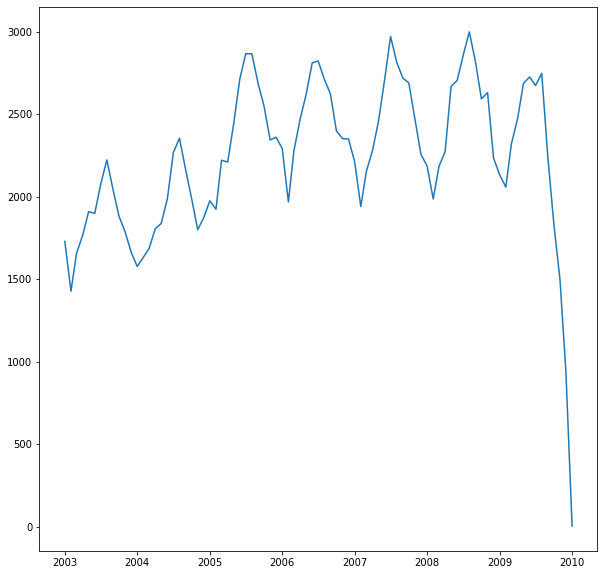

In [ ]:
myLocator = mticker.MultipleLocator(1000)
fig, ax = plt.subplots(figsize=(10,10))
arr = dfshort.loc[dfshort['ED1'] == '1']
arr = arr.reset_index(drop=True)
t = pd.to_datetime(arr['Date'], format = "%m/%d/%Y")
arr['Date'] = t
arr['Date'] = arr['Date'].dt.to_period('M')
arr = arr['Date'].value_counts().sort_index()
#arr = arr.groupby(arr['Date'].dt.strftime('%m/%Y'))['ED1'].value_counts().sort_index()
#arr = arr.droplevel(1, axis =0)
arr = arr.to_timestamp()
ax.plot(arr, label = 'Count')
#plt.xticks(rotation = 30)
#ax.xaxis.set_major_locator(myLocator)

In [ ]:
totals_per_ED = dfshort.groupby('Place of Crime').count()
totals_per_ED = totals_per_ED.rename(columns={'Date':'Count'})

In [ ]:
totals_per_ED.nlargest(n=10, columns = 'Count')

,Count
Place of Crime,
1,190114
9,184390
2,158728
,140011
21,117317
5,63533
10,34679
71,33131
76,26137


In [ ]:
place = [1,9,2,21,5]
places = ['Single Family Home','Public Highway','Housing Unit','Street','Parking Lot']

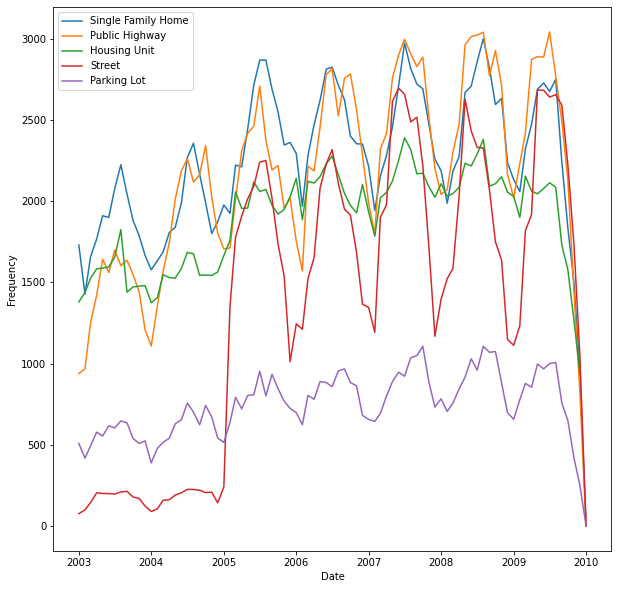

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
for i in place:
  arr = dfshort.loc[dfshort['Place of Crime'] == str(i)]
  arr = arr.reset_index(drop=True)
  t = pd.to_datetime(arr['Date'], format = "%m/%d/%Y")
  arr['Date'] = t
  arr['Date'] = arr['Date'].dt.to_period('M')
  arr = arr['Date'].value_counts().sort_index()
  arr = arr.to_timestamp()
  plt.plot(arr)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(places)

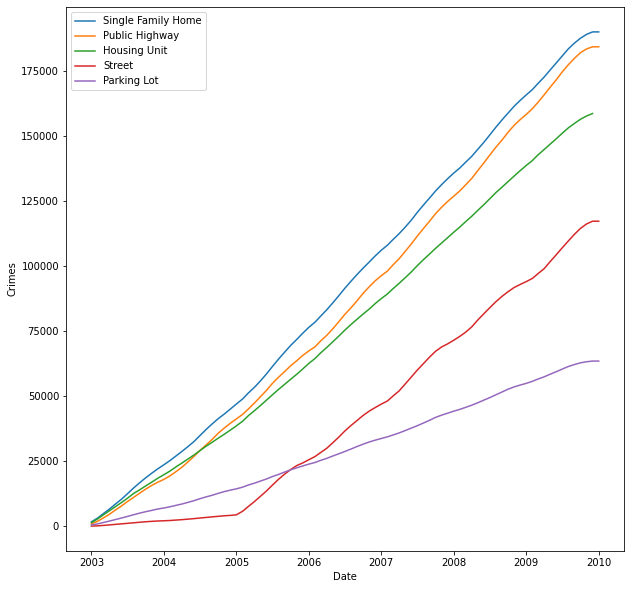

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
for i in place:
  arr = dfshort.loc[dfshort['Place of Crime'] == str(i)]
  arr = arr.reset_index(drop=True)
  t = pd.to_datetime(arr['Date'], format = "%m/%d/%Y")
  arr['Date'] = t
  arr['Date'] = arr['Date'].dt.to_period('M')
  arr = arr['Date'].value_counts().sort_index()
  arr = arr.to_timestamp()
  plt.plot(arr.cumsum())
plt.xlabel('Date')
plt.ylabel('Crimes')
plt.legend(places)